In [1]:
import pandas as pd
import seaborn as sns
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import copy
import color_t
pd.set_option('display.max_columns', None)
sns.set()
import random
import corner
import numpy as np
from om10 import plotting
from astropy.table import Table

/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# Read the data
pd.set_option('display.max_columns', None)
qsos = pd.read_csv("../StatisticalMethods/examples/SDSScatalog/data/qso10000.csv",index_col=0)
# Clean out extreme colors and bad magnitudes:
qsos = qsos[(qsos["dered_r"] > -9999) & (qsos["g_r_color"] > -10) & (qsos["g_r_color"] < 10)]
# Change to Numpy Array because it is easier to manipulate
qso = qsos.as_matrix()

In [3]:
# color the quasars with the method written
z=[]
i=[]
gr=[]
ri=[]
iz=[]
for number in range(10):
    # key : ra dec dered_u dered_g dered_r dered_i dered_z mag_u mag_g mag_r 
    # mag_i mag_z spec_z u_g_color g_r_color r_i color i_z carlar ...
    rand = random.randint(0, len(qso))
    redshift = qso[rand][12]
    r_calc, g_calc, i_calc, z_calc = color_t.CalculateMagnitude('data', 'source', redshift)
    g_r = g_calc-r_calc
    r_i = r_calc-i_calc
    i_z = i_calc-z_calc
    z.append(redshift)
    i.append(i_calc)
    gr.append(g_r)
    ri.append(r_i)
    iz.append(i_z)
print z
print i
print gr
print ri
print iz

1
1
1
1
1
1
1
1
1
1
[1.060591, 1.9959490000000002, 2.013801, 1.262623, 1.522368, 0.24629279999999998, 0.6391077, 1.507099, 1.060236, 1.221873]
[23.086430462429533, 24.582781016177137, 24.614573727991747, 23.510634369877341, 23.826742154915578, 19.313398595971766, 21.555650013815647, 23.808566262423323, 23.08565290716497, 23.423705651587827]
[0.2630953992123537, 0.095233791784576027, 0.097235257627357186, 0.30072113812605394, 0.18303917272406522, 0.22766917877203596, 0.0040220006890869797, 0.18979603137042744, 0.26301361245749177, 0.29265215536856815]
[-0.017251412303586733, 0.17999562090251686, 0.17186949647044258, 0.027044602946613594, 0.21294357432965683, -0.037124119107058817, 0.16100402686010185, 0.20410827217065375, -0.01737312462275753, 0.025833018658179441]
[0.02815347090221465, 0.18013514534093389, 0.19291271654131137, -0.018638429620366992, -0.029219481803124836, 0.071207825832622973, 0.001718480607266315, -0.029070101184522912, 0.02855622896772303, -0.027210556927816043]


/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


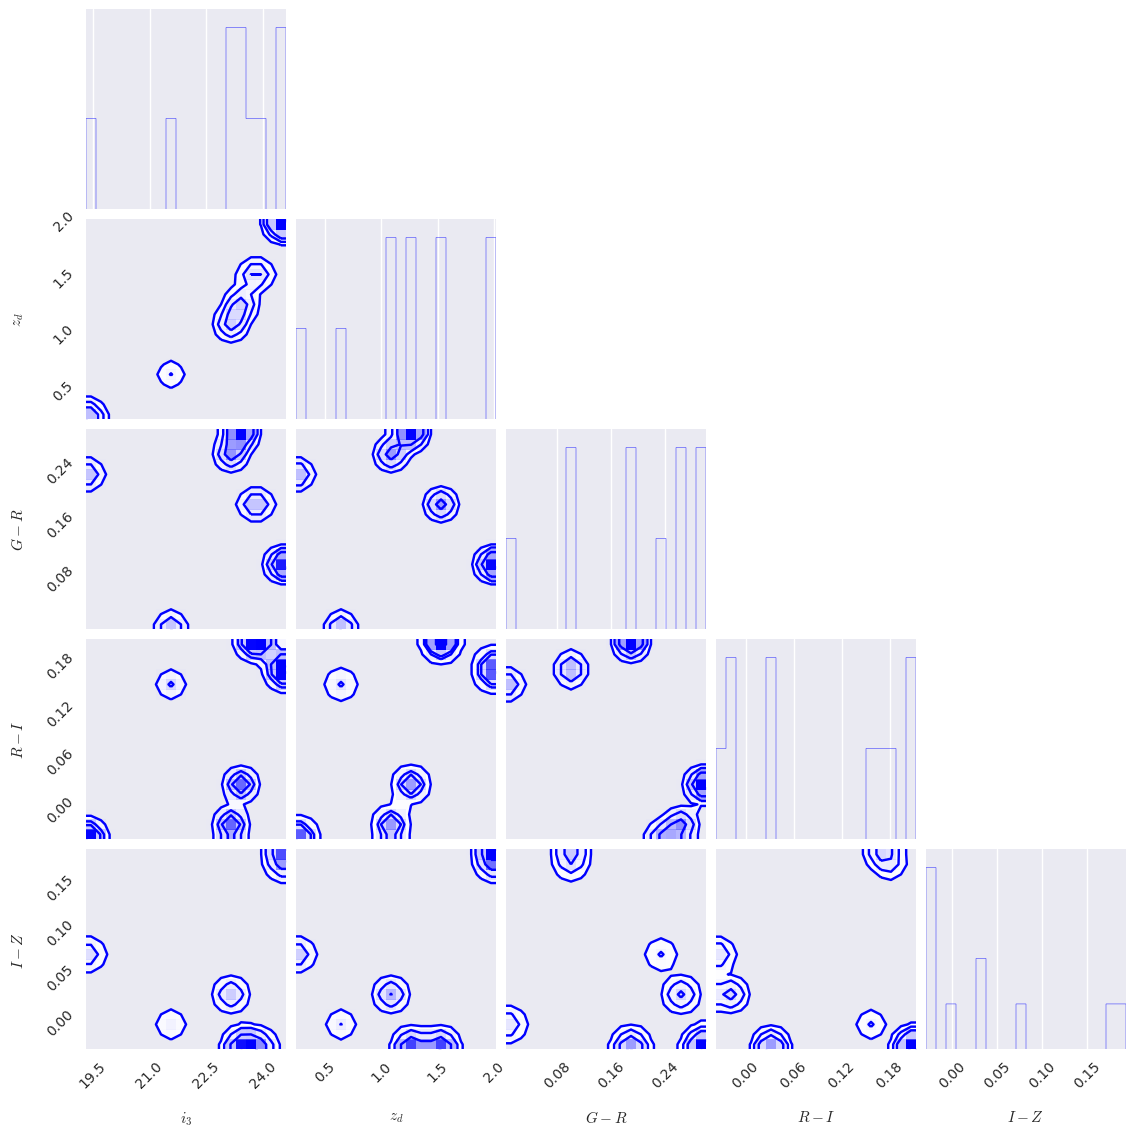

In [4]:
matplotlib.rc('text', usetex=False)
# plot the above colored lens
data = Table({'MAGI': i, 'ZLENS': z, 'GR': gr, 'RI': ri, 'IZ': iz}, names=['MAGI', 'ZLENS', 'GR', 'RI', 'IZ'])
features, labels = plotting.extract_features(data, ('MAGI','ZLENS', 'GR', 'RI', 'IZ'))
fig1 = corner.corner(features, labels=labels, color='blue', smooth=1.0)

In [17]:
z = qsos["spec_z"].as_matrix()
i = qsos["mag_i"].as_matrix()
gr = qsos["g_r_color"].as_matrix()
ri = qsos["r_i_color"].as_matrix()
iz = qsos["i_z_color"].as_matrix()

[ 0.05802727  0.1818466   0.1823177  ...,  0.1688099   0.2620277
 -0.00636673]
here
[ 0.09975052  0.2347431   0.121645   ...,  0.1775608   0.07964516
  0.1026287 ]
here
[ 0.02007675 -0.1286125  -0.02820206 ...,  0.2985935   0.1800117   0.2847767 ]
[[  1.92484700e+01   6.52417100e-01   5.80272700e-02   9.97505200e-02
    2.00767500e-02]
 [  1.89422200e+01   1.53712300e+00   1.81846600e-01   2.34743100e-01
   -1.28612500e-01]
 [  1.85788600e+01   1.46710100e+00   1.82317700e-01   1.21645000e-01
   -2.82020600e-02]
 ..., 
 [  1.92010700e+01   2.05925500e+00   1.68809900e-01   1.77560800e-01
    2.98593500e-01]
 [  1.92235400e+01   9.20328700e-01   2.62027700e-01   7.96451600e-02
    1.80011700e-01]
 [  1.99247400e+01   1.66252900e+00  -6.36673000e-03   1.02628700e-01
    2.84776700e-01]]
['$i_3$', '$z_d$', '$G-R$', '$R-I$', '$I-Z$']


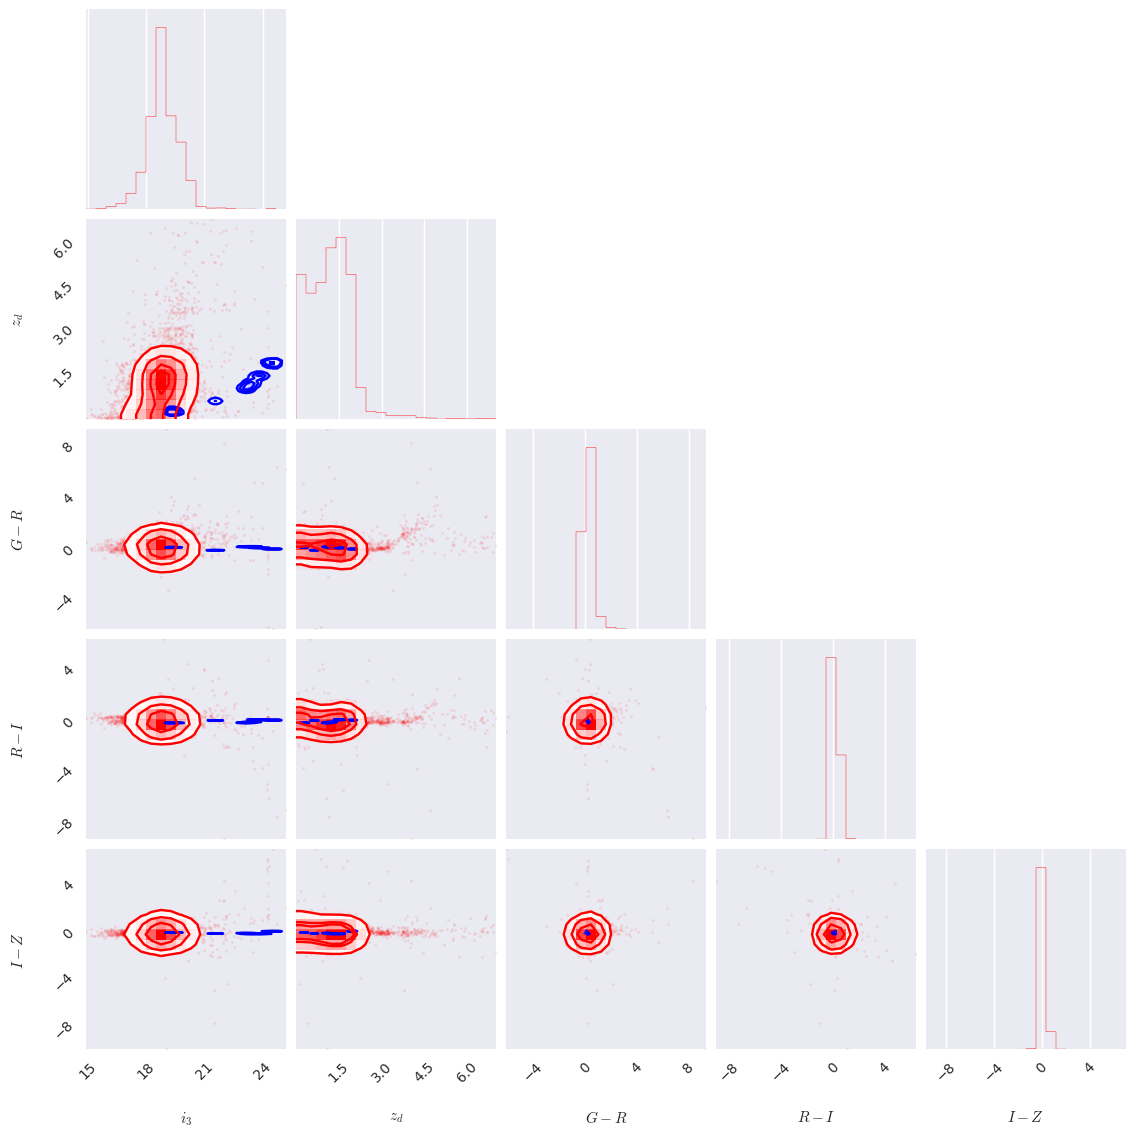

In [18]:
matplotlib.rc('text', usetex=False)
# plot the above colored lens
data = Table({'MAGI': i, 'ZLENS': z, 'GR': gr, 'RI': ri, 'IZ': iz}, names=['MAGI', 'ZLENS', 'GR', 'RI', 'IZ'])
features, label = plotting.extract_features(data, ('MAGI','ZLENS', 'GR', 'RI', 'IZ'))
corner.corner(features, labels=labels, color='red', smooth=1.0, fig=fig1)

In [ ]:
# color the quasars with the method written
z=[]
i=[]
gr=[]
ri=np.array([])
iz=np.array([])
for number in range(10):
    # key : ra dec dered_u dered_g dered_r dered_i dered_z mag_u mag_g mag_r 
    # mag_i mag_z spec_z u_g_color g_r_color r_i color i_z carlar ...
    rand = random.randint(0, len(qso))
    redshift = qso[rand][12]
    print redshift
    r_calc, g_calc, i_calc, z_calc = color_t.CalculateMagnitude('data', 'source', redshift)
    g_r = g_calc-r_calc
    r_i = r_calc-i_calc
    i_z = i_calc-z_calc
    z = np.append(z, redshift)
    print i_calc
    i = np.append(i, i_calc)
    print i
    gr = np.append(gr, g_r)
    ri = np.append(ri, r_i)
    iz = np.append(iz, i_z)
print z
print i
print gr
print ri
print iz

In [ ]:
    r_real = source[7]
    g_real = source[8]
    i_real = source[9]
    z_real = source[10]

In [ ]:
z=np.array([])
i=np.array([])
gr=np.array([])
ri=np.array([])
iz=np.array([])
for i in range(10):
    random = random.randrange(len(qso))
    z = np.append(source[random][12])
    i = np.append(source[random][10])
    gr = np.append(source[random][14])
    ri = np.append(source[random][15])
    iz = np.append(source[random][16])
print z    

# key : ra dec dered_u dered_g dered_r dered_i dered_z mag_u mag_g mag_r 
# mag_i mag_z spec_z u_g_color g_r_color r_i color i_z carlar ...

random.randrange(qso)
# key for the file: ra  dec  z  mag_u  mag_g  mag_r  mag_i  mag_z 
r_real = source[7]
g_real = source[8]
i_real = source[9]
z_real = source[10]
redshift = source[13]
make_cornerplot(r_real, g_real, i_real, z_real, redshift)
r_calc, g_calc, i_calc, z_calc = color_t.CalculateMagnitude('data', 'source', redshift)
make_cornerplot(r_calc, g_calc, i_calc, z_calc, redshift)

In [ ]:
# load the "real" values and overlap it with the previous one
# ra  dec  z  mag_u  mag_g  mag_r  mag_i  mag_z
table = np.loadtxt('../data/SDSS_LRGs.txt')

z = table[2]
i = table[7]
gr = table[5]-table[6]
ri = table[6]-table[7]
iz = table[7]-table[8]

data = Table({'MAGI': i, 'ZLENS': z, 'GR': gr, 'RI': ri, 'IZ': iz}, names=['MAGI', 'ZLENS', 'GR', 'RI', 'IZ'])
features, labels = plotting.extract_features(data, ('MAGI','ZLENS', 'GR', 'RI', 'IZ'))
corner.corner(features, labels=labels, color='red', smooth=1.0, fig=fig)

In [ ]:
def make_cornerplot(r, g, i, z, redshift):
    gr = g - r
    print gr
    ri = r - i
    print ri
    iz = i - z
    print iz
    features = np.array([redshift, i, gr, ri, iz])
    print features
    labels = np.array(['redshift', 'i-band magnitude', 'g-r', 'r-i', 'i-z'])
    fig = corner.corner(features, labels=labels, color='black', smooth=1.0)

In [ ]:
# Read the data
qsos = pd.read_csv("../StatisticalMethods/examples/SDSScatalog/data/qso10000.csv",index_col=0)
# Clean out extreme colors and bad magnitudes:
qsos = qsos[(qsos["dered_r"] > -9999) & (qsos["g_r_color"] > -10) & (qsos["g_r_color"] < 10)]
qsos.head()
# Change to Numpy Array because it is easier to manipulate
qso = qsos.as_matrix()
#print qso[0][7] [8] [9] [10]

In [ ]:
# I HAVE TO DRAW CORNERPLOT NOT THIS

# initialize the histogram
plt.figure()
plt.xlabel("Filter")
plt.ylabel("apparent magnitude difference")
x = np.array([1,2,3,4])
xticks = ['R','G','I','Z']
plt.xticks(x, xticks)
# for each source assign an array
# pick three sources for the quasars
for i, c in zip(range(0,3), ['bo-', 'go-', 'ro-']):
    source = qso[random.randint(0, len(qso))]
    # initialize the numpy array
    magDiff = np.empty(4)
    r_real = source[7]
    g_real = source[8]
    i_real = source[9]
    z_real = source[10]
    redshift = source[13]
    r_calc, g_calc, i_calc, z_calc = color_t.CalculateMagnitude('data', 'source', redshift)
    r_diff = r_calc-r_real
    g_diff = g_calc-g_real
    i_diff = i_calc-i_real
    z_diff = z_calc-z_real
    y_diff = np.array([r_diff,g_diff,i_diff,z_diff])
    lens = plt.plot(x, y_diff, c, label = redshift)
plt.legend()

In [ ]:
# key for the file: ra  dec  z  mag_u  mag_g  mag_r  mag_i  mag_z 
r_real = source[7]
g_real = source[8]
i_real = source[9]
z_real = source[10]
redshift = source[13]
make_cornerplot(r_real, g_real, i_real, z_real, redshift)
r_calc, g_calc, i_calc, z_calc = color_t.CalculateMagnitude('data', 'source', redshift)
make_cornerplot(r_calc, g_calc, i_calc, z_calc, redshift)

In [ ]:
    """
    Given an arbitrary sample, make a corner plot of the required quantities.
    Parameters
    ----------
    parameters : str, tuple
        Names of the lens parameters to plot
    saveImg : bool
        If true, save image with standardized name.
    IQ : float
        Image quality, for reference.
    fig : matplotlib figure object
        Overlay plot on an existing figure
    Returns
    -------
    fig : matplotlib figure object
        New or updated figure
    """

    #features, labels = extract_features(sample, parameters)
    #features = features[0]

"""   
    redshift = sample['ZLENS']
    imag = sample['i_SDSS']
    gr = sample['g_SDSS']-sample['r_SDSS']
    ri = sample['r_SDSS']-sample['i_SDSS']
    iz = sample['i_SDSS']-sample['z_SDSS']

    moke_features = np.array([redshift, imag, gr, ri, iz])

    # for same lenses, overlap the lenses
    sample_lens = np.loadtxt(real_data)
    # key for the file: ra  dec  z  mag_u  mag_g  mag_r  mag_i  mag_z   
    redshift = [row[2] for row in sample_lens]
    gmag = [row[4] for row in sample_lens]
    rmag = [row[5] for row in sample_lens]
    imag = [row[6] for row in sample_lens]
    zmag = [row[7] for row in sample_lens]
    gr = gmag-rmag
    ri = rmag-imag
    iz = imag-zmag

    features = np.array([redshift, imag, gr, ri, iz])
        

    labels = np.array(['redshift', 'i-band magnitude', 'g-r', 'r-i', 'i-z'])

    if fig is None:
        fig = corner.corner(moke_features, labels=labels, color=color, smooth=1.0)
        fig = corner.corner(features, labels=labels, color=color, smooth=1.0)
    else:
        _   = corner.corner(moke_features, labels=labels, color=color, smooth=1.0, fig=fig)
        fig = corner.corner(features, labels=labels, color=color, smooth=1.0)

    if saveImg:
        pngfile = "om10_sample.png"
        pylab.savefig(pngfile)
        print "OM10: Sample plot saved to file:", pngfile

    return fig

"""